In [1]:
import pandas as pd

# Read the data using csv
data=pd.read_csv('housing.csv')

# See initial 5 records
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
data1=data[["MedInc","Latitude","Longitude"]]

In [3]:
data1.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
from sklearn.preprocessing import StandardScaler 
  
# Initialize the StandardScaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(data1['MedInc'].values.reshape(-1,1)) 
data1['MedInc_std_scaler']=scaler.transform(data1['MedInc'].values.reshape(-1,1))


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19652\933397294.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['MedInc_std_scaler']=scaler.transform(data1['MedInc'].values.reshape(-1,1))


In [5]:
data1.head()

,MedInc,Latitude,Longitude,MedInc_std_scaler
0,8.3252,37.88,-122.23,2.344766
1,8.3014,37.86,-122.22,2.332238
2,7.2574,37.85,-122.24,1.782699
3,5.6431,37.85,-122.25,0.932968
4,3.8462,37.85,-122.25,-0.012881


In [6]:
data2=data1.drop(["MedInc"], axis=1)

In [7]:
data2.head()

,Latitude,Longitude,MedInc_std_scaler
0,37.88,-122.23,2.344766
1,37.86,-122.22,2.332238
2,37.85,-122.24,1.782699
3,37.85,-122.25,0.932968
4,37.85,-122.25,-0.012881


In [8]:
print(data2.shape)

(20640, 3)


In [9]:
data3=data2.sample(n=int(data2.shape[0]*0.1)).reset_index(drop=True)

Text(0.5, 0, 'Longitude')

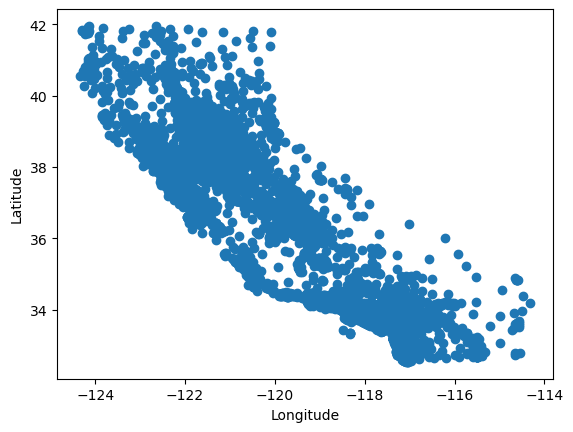

In [10]:
import matplotlib.pyplot as plt

plt.scatter(data2["Longitude"], data2["Latitude"])
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# • Perform k‐means clustering on the selected attributes, specifying k = 6 clusters and plot.

In [11]:
import numpy as np
from sklearn.cluster import KMeans

X=data2[["MedInc_std_scaler"]]
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)

data4=data2.sample(n=int(data2.shape[0]*0.1)).reset_index(drop=True)
X1=data2[["MedInc_std_scaler"]]
y_kmeans = kmeans.predict(X1)

Text(0.5, 0, 'Longitude')

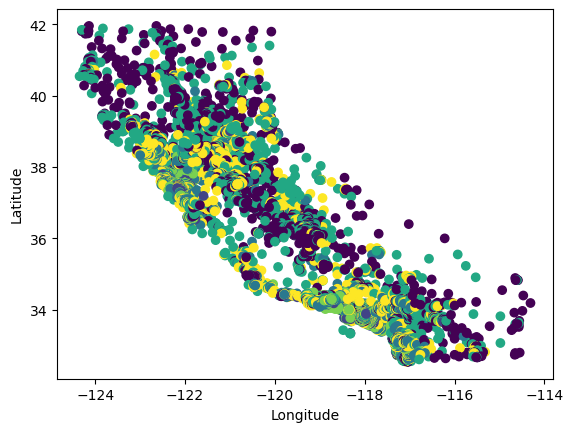

In [12]:
plt.scatter(data2["Longitude"], data2["Latitude"], c = y_kmeans)
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# Hence we can determine the economic segments across the state of California

# • Apply the elbow method to determine the best k and plot.

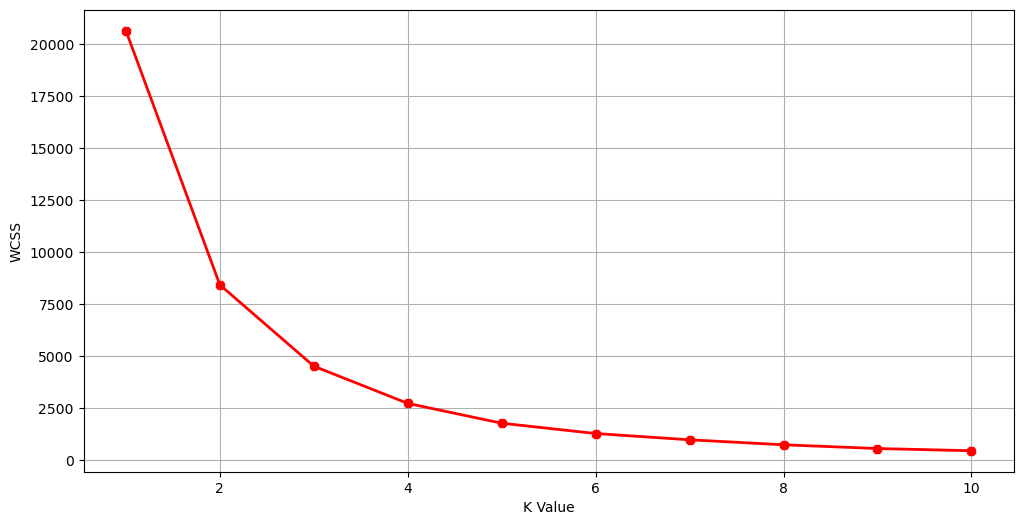

In [13]:
wcss=[]

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize =( 12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# According to the curve, we can determine that the best K is 6, because the WCSS value still change relatively significantly from 5 to 6 but not significantly enough from 6 to 7.

# • Evaluate the quality of the clusters using the Silhouette Coefficient method.

In [14]:
from sklearn.metrics import silhouette_score

sc=[]

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X1)
    result_list = kmeans.predict(X1)
    sc.append(silhouette_score(X1, result_list))

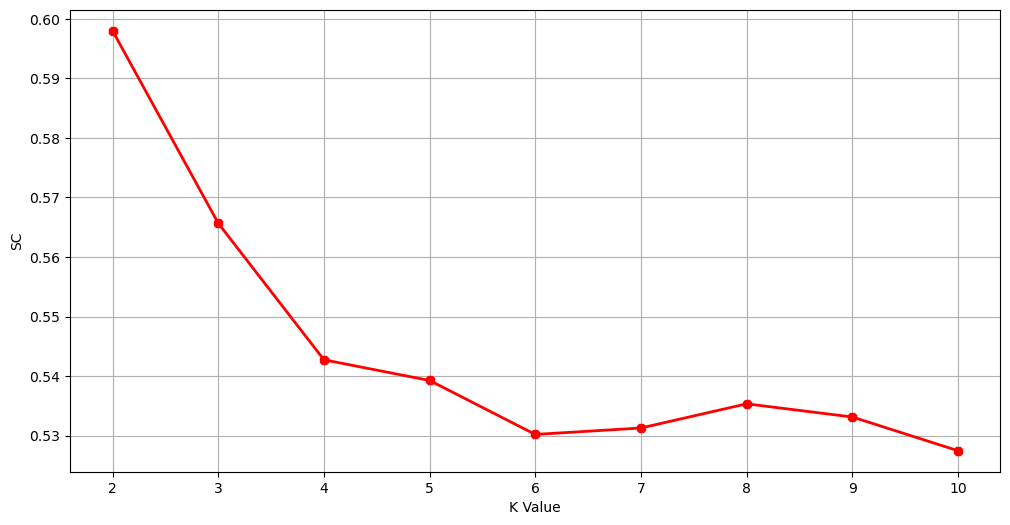

In [15]:
plt.figure(figsize =( 12,6))
plt.grid()
plt.plot(range(2,11),sc,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("SC")
plt.show()

# According to the plot, we can tell that the quality of the clusters is not as satisfying when k=6 because of its lower silhouette score. 